### Assignment 3 - Logistic Regression

In [7]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we will build logistic regression models to detect accounting fraud using financial statement features. <br>
The data was collected by Bao et al. (2020) based on the detected material accounting misstatements disclosed in the SEC’s Accounting and Auditing Enforcement Releases (AAERs). <br>
The dataset covers all publicly listed U.S. firms over the period 1990– 2014. The variable name of the fraud label is "misstate" (1 denotes fraud, and 0 denotes non-fraud). <br>
We will use both raw financial data from the financial statements and the financial ratios that are used to evaluate the financial performance of a company for detection.<br>

You may find the description of variables in the Word document.

1. Import the libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy

2. Read in the dataset and display basic information about the dataset.

In [9]:
df = pd.read_csv("AccountingFraud.csv")

In [10]:
df.head()

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [12]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0], df.shape[1]))

There are 146045 rows and 44 columns in the dataset


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   misstate     146045 non-null  int64  
 2   act          146045 non-null  float64
 3   ap           146045 non-null  float64
 4   at           146045 non-null  float64
 5   ceq          146045 non-null  float64
 6   che          146045 non-null  float64
 7   cogs         146045 non-null  float64
 8   csho         146045 non-null  float64
 9   dlc          146045 non-null  float64
 10  dltis        146045 non-null  float64
 11  dltt         146045 non-null  float64
 12  dp           146045 non-null  float64
 13  ib           146045 non-null  float64
 14  invt         146045 non-null  float64
 15  ivao         146045 non-null  float64
 16  ivst         146045 non-null  float64
 17  lct          146045 non-null  float64
 18  lt           146045 non-

In [14]:
df.describe()

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,2002.011702,0.006601,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,97.004595,127.228109,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,6.959894,0.080976,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,540.874888,1023.091819,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,1990.000000,0.000000,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,0.000000,-0.069000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,1996.000000,0.000000,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,8.796000,0.008000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,2002.000000,0.000000,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,22.540000,1.363000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,2008.000000,0.000000,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,60.736000,12.750000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,2014.000000,1.000000,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,100092.395000,75553.000000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


3. Explore the variable 'misstate' with a graph. What do you observe?

In [15]:
df['misstate'].value_counts()

0    145081
1       964
Name: misstate, dtype: int64

In [16]:
df['misstate'].describe()

count    146045.000000
mean          0.006601
std           0.080976
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: misstate, dtype: float64

C:\Users\siris\AppData\Local\Temp\ipykernel_10392\2534460444.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='misstate', ylabel='count'>

Text(0.5, 1.0, 'Counts of misstate')

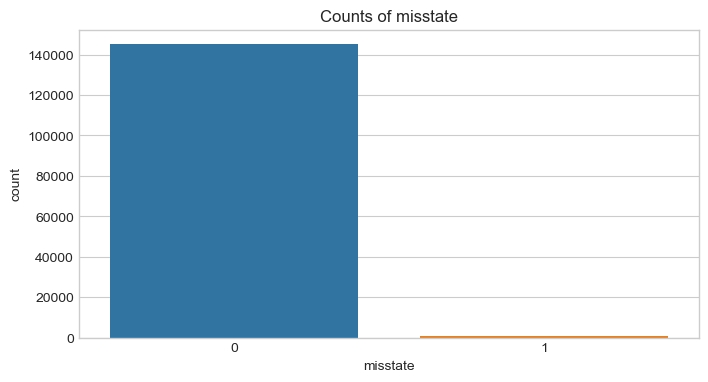

In [17]:
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(8,4))
sns.countplot(x='misstate',data=df)
plt.title("Counts of misstate")

Findings: In the dataset there are 146045 rows and the variable Misstate has 145081 non-fraud accounts and 964 fraud accounts.
Misstate is the target variable and proportion of 1's and 0's are highly imbalanced. The data has 99.33 percentage of records with misstate '0' and 0.66 percentage of '1'.

4. Next we sum the number of fraud cases by year and make a line graph.<br>
First we need to use .groupby() method to do the sum. We did not go over this in class. I explain here.
Then you can use the result to create a line graph.

In [18]:
#Fraud.groupby('fyear')['misstate'].sum().reset_index()

# Groupby method group the data observations by the given variable 'fyear'
# into groups.
# Then the sum() will sum the variable 'misstate'
# reset_index() is to transform the result into a dataframe

Save the output of the code above and make a line graph based on it. What do you observe?

In [19]:
#Groupby to sum the number of fraud cases by year
fraudcase = df.groupby('fyear')['misstate'].sum().reset_index()

In [20]:
fraudcase

,fyear,misstate
0,1990,15
1,1991,27
2,1992,26
3,1993,30
4,1994,23
5,1995,22
6,1996,33
7,1997,42
8,1998,56
9,1999,73


[Text(0.5, 1.0, 'Number of fraud cases by year')]

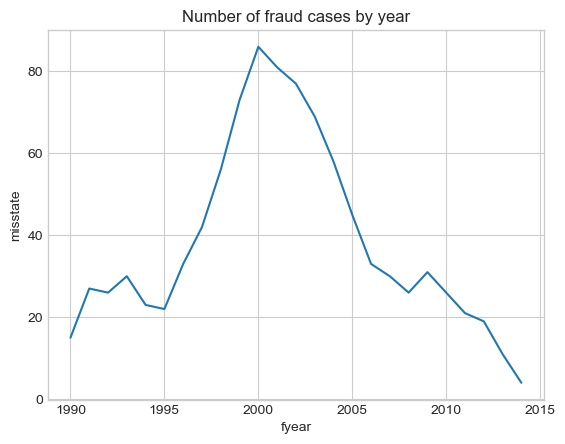

In [21]:
sns.lineplot(data=fraudcase, x="fyear", y="misstate").set(title = 'Number of fraud cases by year')

Findings: A line graph illustrating the trend of fraud cases from 1990 to 2014 can be seen above. As fraud cases increased from 1995 to 2000, the year 2000 had the highest number of fraud cases with 86 fraud accounts. The number of fraud cases gradually decreased between 2000 and 2014. 2014 had the lowest number of fraud cases with 4 fraud accounts. 

5. Missing values. You may notice that some variables have missing values. <br>
Ideally, we need to handle missing values carefully. We will explore that in the future if we have the chance.<br>
For now, we just simply drop the observations with missing values.

In [22]:
df.shape

(146045, 44)

In [24]:
#missing values by column wise
df.isna().sum()

fyear              0
misstate           0
act                0
ap                 0
at                 0
ceq                0
che                0
cogs               0
csho               0
dlc                0
dltis              0
dltt               0
dp                 0
ib                 0
invt               0
ivao               0
ivst               0
lct                0
lt                 0
ni                 0
ppegt              0
pstk               0
re                 0
rect               0
sale               0
sstk               0
txp                0
txt                0
xint               0
prcc_f             0
dch_wc          4759
ch_rsst         4851
dch_rec         4743
dch_inv         4615
soft_assets      592
ch_cs          15918
ch_cm          17107
ch_roa         12678
issue              0
bm                18
dpi             9228
reoa             591
EBIT             591
ch_fcf          5407
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.shape

(126483, 44)

In [27]:
#Fraud = Fraud.dropna()

6. Now let's fit logistic regression models. First, we only use the 28 raw accounting variables as the independent variables. You may find the definitions of them in the Word document.

Prepare the data.

In [28]:
X = df.iloc[:,2:30]

In [29]:
#use patsy library to prepare design matrices
y, x = patsy.dmatrices("misstate ~ {}".format(" + ".join(X)), data = df, return_type = 'dataframe')

In [30]:
y.columns
x.columns

Index(['misstate'], dtype='object')

Index(['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f'],
      dtype='object')

In [31]:
y.head()
x.head()

,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Intercept,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,ppegt,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f
0,1.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,...,31.767,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000
1,1.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,...,7.328,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188
2,1.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,...,78.331,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125
3,1.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,...,11.145,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562
4,1.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,...,5.782,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125


7. Fit the model

In [32]:
log_model = sm.Logit(y,x)
log_res = log_model.fit()
log_res.summary()

Optimization terminated successfully.
         Current function value: 0.041878
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126454
Method:                           MLE   Df Model:                           28
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                 0.01767
Time:                        13:24:19   Log-Likelihood:                -5296.8
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                 4.086e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0167      0.035   -141.978      0.000      -5.086      -4.947
act            0.0002   6.49e-05      3.360      0.001    9.09e-05       0.000
ap             0.0003   6.64e-05      4.490      0.000       0.000       0.000
at         -6.578e-07   7.19e-05     -0.009      0.993      -0.000       0.000
ceq         2.411e-05   7.29e-05      0.331      0.741      -0.000       0.000
che           -0.0002   7.26e-05     -2.896      0.004      -0.000    -6.8e-05
cogs        -2.82e-05   2.14e-05     -1.319      0.187   -7.01e-05    1.37e-05
csho        4.195e-05    2.3e-05      1.822      0.068   -3.16e-06    8.71e-05
dlc        -7.837e-05   7.22e-05     -1.086      0.277      -0.000     6.3e-05
dltis       1.371e-05   2.37e-05      0.579      0.562   -3.27e-05    6.01e-05
dltt        4.041e-05   4.01e-05      1.008      0.313   -3.82e-05       0.000
dp            -0.0002      0.000     -1.537      0.124      -0.000    5.33e-05
ib         -9.332e-05      0.000     -0.786      0.432      -0.000       0.000
invt       -9.922e-05   6.94e-05     -1.430      0.153      -0.000    3.67e-05
ivao       -1.974e-06   1.71e-05     -0.115      0.908   -3.55e-05    3.16e-05
ivst       -5.899e-05   7.59e-05     -0.777      0.437      -0.000    8.98e-05
lct           -0.0001   7.03e-05     -1.570      0.116      -0.000    2.74e-05
lt         -4.393e-05   7.89e-05     -0.557      0.578      -0.000       0.000
ni         -1.766e-05      0.000     -0.174      0.862      -0.000       0.000
ppegt      -2.009e-05   7.51e-06     -2.676      0.007   -3.48e-05   -5.38e-06
pstk          -0.0001      0.000     -0.389      0.697      -0.001       0.000
re         -7.699e-06   7.47e-06     -1.030      0.303   -2.23e-05    6.95e-06
rect       -8.394e-05   6.44e-05     -1.303      0.192      -0.000    4.23e-05
sale        1.844e-05      2e-05      0.922      0.357   -2.08e-05    5.77e-05
sstk           0.0002   4.94e-05      4.230      0.000       0.000       0.000
txp         3.215e-05      0.000      0.150      0.881      -0.000       0.000
txt        -1.766e-05      0.000     -0.145      0.885      -0.000       0.000
xint           0.0012      0.000      5.096      0.000       0.001       0.002
prcc_f         0.0009      0.000      4.246      0.000       0.001       0.001
==============================================================================
"""

8. Make the predictions for probabilities and classify.

In [33]:
log_pred = log_res.predict(x) #making the predictions

In [34]:
log_pred

0         0.006640
1         0.006598
2         0.006643
3         0.006615
4         0.006595
            ...   
146039    0.008112
146040    0.007419
146041    0.010544
146042    0.007738
146044    0.006930
Length: 126483, dtype: float64

In [35]:
pred_class = (log_pred > 0.5).astype(int) #Classifying the probabilities

In [36]:
pred_class

0         0
1         0
2         0
3         0
4         0
         ..
146039    0
146040    0
146041    0
146042    0
146044    0
Length: 126483, dtype: int32

9. Calculate the accuracy rate.

In [37]:
y['misstate_predicted'] = pred_class

In [38]:
y

,misstate,misstate_predicted
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
146039,0.0,0
146040,0.0,0
146041,0.0,0
146042,0.0,0


In [39]:
y['correct_pred'] = np.where(y['misstate'] == y['misstate_predicted'], 1,0)

In [40]:
y['correct_pred'].sum() / len(y) #Calculating the accuarcy rate

0.9927974510408514

Fitting the model with 28 raw accounting variables, the probability predictions are accurate with 99.279%

10. Repeat 6-9 using the 14 financial ratio variables.

In [41]:
X14 = df.iloc[:,30:45]

In [42]:
y14, x14 = patsy.dmatrices("misstate ~ {}".format(" + ".join(X14)), data = df, return_type = 'dataframe')

In [43]:
log_model14 = sm.Logit(y14,x14)
log_res14 = log_model14.fit()
log_res14.summary()

Optimization terminated successfully.
         Current function value: 0.040796
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126468
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                 0.04303
Time:                        13:24:37   Log-Likelihood:                -5160.1
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                 3.716e-90
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.1554      0.222    -32.176      0.000      -7.591      -6.720
dch_wc         -0.9463      0.366     -2.586      0.010      -1.663      -0.229
ch_rsst         0.9744      0.283      3.446      0.001       0.420       1.529
dch_rec         2.0044      0.464      4.318      0.000       1.095       2.914
dch_inv         1.2629      0.640      1.973      0.048       0.009       2.517
soft_assets     1.8892      0.149     12.680      0.000       1.597       2.181
ch_cs           0.0576      0.026      2.215      0.027       0.007       0.108
ch_cm          -0.0024      0.015     -0.163      0.870      -0.031       0.026
ch_roa         -0.5019      0.218     -2.307      0.021      -0.928      -0.075
issue           1.2184      0.184      6.630      0.000       0.858       1.579
bm             -0.0688      0.033     -2.083      0.037      -0.134      -0.004
dpi             0.0457      0.077      0.591      0.555      -0.106       0.197
reoa            0.2432      0.040      6.075      0.000       0.165       0.322
EBIT           -0.4304      0.138     -3.125      0.002      -0.700      -0.160
ch_fcf          0.4192      0.237      1.768      0.077      -0.046       0.884
===============================================================================
"""

In [44]:
log_pred14 = log_res14.predict(x14)

In [45]:
pred_class14 = (log_pred14 > 0.5).astype(int)

In [46]:
y['misstate_predicted14'] = pred_class14

In [47]:
y['correct_pred14'] = np.where(y['misstate'] == y['misstate_predicted14'], 1,0)

In [48]:
y['correct_pred14'].sum() / len(y)

0.992813263442518

Fitting the model with 14 financial ratio variables, the probability predictions are accurate with 99.281%

11. Repeat 6-9 using all 42 (28+14) variables. Which model gives the best accuracy rate?

In [49]:
X42 = df.iloc[:,2:45]

In [50]:
y42, x42 = patsy.dmatrices("misstate ~ {}".format(" + ".join(X42)), data = df, return_type = 'dataframe')

In [51]:
log_model42 = sm.Logit(y42,x42)
log_res42 = log_model42.fit()
log_res42.summary()

Optimization terminated successfully.
         Current function value: 0.040220
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126440
Method:                           MLE   Df Model:                           42
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                 0.05656
Time:                        13:24:45   Log-Likelihood:                -5087.2
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                7.739e-102
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.1695      0.225    -31.796      0.000      -7.611      -6.728
act             0.0002   6.59e-05      3.130      0.002    7.71e-05       0.000
ap              0.0003   6.95e-05      4.337      0.000       0.000       0.000
at          -4.644e-06   6.77e-05     -0.069      0.945      -0.000       0.000
ceq          1.881e-05   6.82e-05      0.276      0.783      -0.000       0.000
che            -0.0002   7.46e-05     -2.125      0.034      -0.000   -1.23e-05
cogs        -2.204e-05   2.16e-05     -1.022      0.307   -6.43e-05    2.02e-05
csho         4.306e-05   2.22e-05      1.935      0.053   -5.45e-07    8.67e-05
dlc         -4.019e-05   7.39e-05     -0.544      0.586      -0.000       0.000
dltis        1.254e-06   2.57e-05      0.049      0.961   -4.91e-05    5.16e-05
dltt         3.781e-05   3.82e-05      0.990      0.322   -3.71e-05       0.000
dp             -0.0002      0.000     -1.293      0.196      -0.000    8.17e-05
ib             -0.0001      0.000     -1.035      0.300      -0.000    9.88e-05
invt           -0.0001   7.07e-05     -1.537      0.124      -0.000    2.99e-05
ivao         2.692e-06   1.79e-05      0.151      0.880   -3.23e-05    3.77e-05
ivst        -8.048e-05   7.87e-05     -1.023      0.306      -0.000    7.38e-05
lct            -0.0001   7.15e-05     -1.574      0.116      -0.000    2.76e-05
lt          -4.851e-05   7.56e-05     -0.642      0.521      -0.000    9.96e-05
ni          -3.683e-06   8.77e-05     -0.042      0.967      -0.000       0.000
ppegt       -1.801e-06    7.8e-06     -0.231      0.817   -1.71e-05    1.35e-05
pstk        -9.442e-05      0.000     -0.348      0.728      -0.001       0.000
re           -1.27e-05   7.89e-06     -1.611      0.107   -2.82e-05    2.75e-06
rect           -0.0001   6.69e-05     -1.628      0.103      -0.000    2.22e-05
sale         1.285e-05   2.03e-05      0.632      0.527    -2.7e-05    5.27e-05
sstk            0.0002   5.15e-05      3.466      0.001    7.75e-05       0.000
txp          6.482e-05      0.000      0.310      0.756      -0.000       0.000
txt         -1.053e-05      0.000     -0.089      0.929      -0.000       0.000
xint            0.0012      0.000      4.746      0.000       0.001       0.002
prcc_f          0.0010      0.000      3.998      0.000       0.001       0.001
dch_wc         -0.9484      0.372     -2.547      0.011      -1.678      -0.218
ch_rsst         0.9954      0.286      3.482      0.000       0.435       1.556
dch_rec         2.1294      0.472      4.511      0.000       1.204       3.055
dch_inv         1.3559      0.654      2.074      0.038       0.075       2.637
soft_assets     1.8267      0.154     11.826      0.000       1.524       2.129
ch_cs           0.0594      0.026      2.266      0.023       0.008       0.111
ch_cm          -0.0030      0.015     -0.200      0.842      -0.032       0.026
ch_roa         -0.4986      0.220     -2.270      0.023      -0.929      -0.068
issue           1.1626      0.185      6.

In [52]:
log_pred42 = log_res42.predict(x42)

In [53]:
pred_class42 = (log_pred42 > 0.5).astype(int)

In [54]:
y['misstate_predicted42'] = pred_class42

In [55]:
y['correct_pred42'] = np.where(y['misstate'] == y['misstate_predicted42'], 1,0)

In [56]:
y['correct_pred42'].sum() / len(y)

0.9928369820450179

Fitting the model with all 42 variables, the probability predictions are accurate with 99.283%

In [57]:
max(y['correct_pred42'].sum() / len(y), y['correct_pred14'].sum() / len(y), y['correct_pred'].sum() / len(y))

0.9928369820450179

Among the three models, the model fitted with all 42 variables has the highest accuracy rate with 99.283% and is the best model. Since the dataset is highly imbalanced, 'Accuracy' is not the right metric to evaluate the model. We need to look at the F-1 score, Precision and Recall metrics to evaluate the model.